In [1]:
%load_ext autoreload
%autoreload 2

## Imports

In [2]:
import scipy.sparse
import sys

import numpy as np
import matplotlib.pyplot as plt

from helper_functions import *
from fbpca import pca
from sklearn.decomposition import TruncatedSVD

from helper_clustering import get_heuristics_kmeans, get_heuristics_spectral

## Load embedding matrices

In [15]:
user_embedding = scipy.sparse.load_npz('../data/users_embedding.npz')
artist_embedding = scipy.sparse.load_npz('../data/artists_embedding.npz')

In [3]:
user_embedding

<355189x60938 sparse matrix of type '<class 'numpy.float64'>'
	with 16860953 stored elements in Compressed Sparse Row format>

In [4]:
artist_embedding

<60938x355189 sparse matrix of type '<class 'numpy.float64'>'
	with 16860953 stored elements in Compressed Sparse Row format>

In [6]:
#artist_embedding_array = artist_embedding.toarray()

# Dimentionality Reduction

## SVD

In [5]:
n_components = [100, 200, 300]

In [5]:
for n_component in n_components:

    svd = TruncatedSVD(n_components=n_component)
    artist_embedding_transformed = svd.fit_transform(artist_embedding)
    user_embedding_transformed = svd.fit_transform(user_embedding)

    save_to_pickle(artist_embedding_transformed,
                   'artist_embedding_transformed_svd{}'.format(n_component),
                   '../data/artist_embeddings/')
    save_to_pickle(user_embedding_transformed,
                   'user_embedding_transformed_svd{}'.format(n_component),
                   '../data/user_embeddings/')

## PCA

In [10]:
for n_component in n_components:
    
    (artist_embedding_transformed, s, Va) = pca(artist_embedding, raw=False, k=n_component, n_iter=1)
    (user_embedding_transformed, s, Va) = pca(user_embedding, raw=False, k=n_component, n_iter=1)
    
    save_to_pickle(artist_embedding_transformed,
                   'artist_embedding_transformed_pca{}'.format(n_component),
                   '../data/artist_embeddings/')
    save_to_pickle(user_embedding_transformed,
                   'user_embedding_transformed_pca{}'.format(n_component),
                   '../data/user_embeddings/')
    

# Clustering

In [3]:
artist_embedding_transformed = load_pickle('../data/artist_embeddings/artist_embedding_transformed_svd100.pickle')
artist_embedding_transformed.shape

(60938, 100)

In [8]:
n_clusters_list = np.arange(3, 33, 3)
n_clusters_list

array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30])

## K-Means

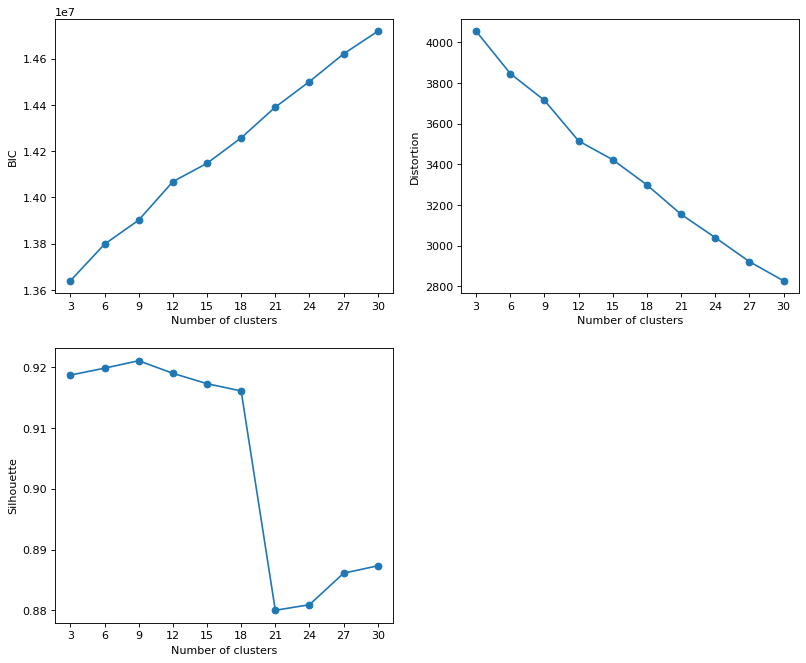

In [9]:
metric_dictionary_kmeans = get_heuristics_kmeans(artist_embedding_transformed, n_clusters_list)

## Spectral clustering

In [11]:
# Too long too run
n_clusters_list = [2, 4]
metric_dictionary_kmeans = get_heuristics_spectral(artist_embedding_transformed, n_clusters_list)

## Hierarchical Clustering